# Object Detection Tutorial

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/georgia-tech-db/eva/blob/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/02-object-detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" /> Download notebook</a>
  </td>
</table>

### Start EVA server

We are reusing the start server notebook for launching the EVA server.

In [1]:
!wget -nc "https://raw.githubusercontent.com/georgia-tech-db/eva/master/tutorials/00-start-eva-server.ipynb"
%run 00-start-eva-server.ipynb
cursor = connect_to_server()

File ‘00-start-eva-server.ipynb’ already there; not retrieving.




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


nohup eva_server >> eva.log 2>&1 &
('03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF FastRCNNObjectDetector already exists, nothing added.\n', '03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF ArrayCount already exists, nothing added.\n', '03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF Timestamp already exists, nothing added.\n')
('03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF Crop already exists, nothing added.\n', '03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF YoloV5 already exists, nothing added.\n', '03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF Open already exists, nothing added.\n')
('03-18-2023 23:59:49 WARNING[create_udf_executor:create_udf_executor.py:exec:0039] UDF Similarity already exists, nothing added.\n', '03-18-2023 23:59:49 WARNING[create_

('/home/jarulraj3/eva/tutorials/face_detector.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.\n', '  outcome = outcome.append(\n', '/home/jarulraj3/eva/tutorials/face_detector.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.\n')
('  outcome = outcome.append(\n', '/home/jarulraj3/eva/tutorials/face_detector.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.\n', '  outcome = outcome.append(\n')
('/home/jarulraj3/eva/tutorials/face_detector.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.\n', '  outcome = outcome.append(\n', '/home/jarulraj3/eva/tutorials/face_detector.py:71: FutureWarning: The frame.append method is deprecated and 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Download the Videos

In [2]:
# Getting the video files
!wget -nc https://www.dropbox.com/s/k00wge9exwkfxz6/ua_detrac.mp4?raw=1 -O ua_detrac.mp4
# Getting the Yolo object detector
!wget -nc https://raw.githubusercontent.com/georgia-tech-db/eva/master/eva/udfs/yolo_object_detector.py

zsh:1: no matches found: https://www.dropbox.com/s/k00wge9exwkfxz6/ua_detrac.mp4?raw=1


File ‘yolo_object_detector.py’ already there; not retrieving.



### Load the surveillance videos for analysis

##### We use regular expression to load all the videos into the table

In [3]:
cursor.execute('DROP TABLE ObjectDetectionVideos')
response = cursor.fetch_all()
print(response)
cursor.execute('LOAD VIDEO "ua_detrac.mp4" INTO ObjectDetectionVideos;')
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                                    0
0  Table Successfully dropped: ObjectDetectionVideos
@query_time: 0.05397782288491726


@status: ResponseStatus.SUCCESS
@batch: 
                            0
0  Number of loaded VIDEO: 1
@query_time: 0.09222686849534512


### Visualize Video

In [4]:
from IPython.display import Video
Video("ua_detrac.mp4", embed=True)

### Register YOLO Object Detector an an User-Defined Function (UDF) in EVA 

In [5]:
cursor.execute("""CREATE UDF IF NOT EXISTS YoloV5
      INPUT  (frame NDARRAY UINT8(3, ANYDIM, ANYDIM))
      OUTPUT (labels NDARRAY STR(ANYDIM), bboxes NDARRAY FLOAT32(ANYDIM, 4),
                scores NDARRAY FLOAT32(ANYDIM))
      TYPE  Classification
      IMPL  'yolo_object_detector.py';
      """)
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                            0
0  UDF YoloV5 already exists, nothing added.
@query_time: 0.014514585956931114


### Run Object Detector on the video

In [6]:
cursor.execute("""SELECT id, YoloV5(data)
                  FROM ObjectDetectionVideos 
                  WHERE id < 20""")
response = cursor.fetch_all()
response.as_df()

objectdetectionvideos.id  \
0                          0   
1                          1   
2                          2   
3                          3   
4                          4   
5                          5   
6                          6   
7                          7   
8                          8   
9                          9   
10                        10   
11                        11   
12                        12   
13                        13   
14                        14   
15                        15   
16                        16   
17                        17   
18                        18   
19                        19   

                                        yolov5.labels  \
0   [car, car, car, car, car, car, car, car, car, ...   
1   [car, car, car, car, car, car, car, car, car, ...   
2   [car, car, car, car, car, car, car, car, car, ...   
3   [car, car, car, car, car, car, car, car, car, ...   
4   [car, car, car, car, car, car, car, car, car, ...   
5   [car, car, car, car, car, car, car, car, car, ...   
6   [car, car, car, car, car, car, car, car, perso...   
7   [car, car, car, car, car, car, car, car, car, ...   
8   [car, car, car, car, car, car, car, car, car, ...   
9   [car, car, car, car, car, car, car, car, car, ...   
10  [car, car, car, car, car, car, car, car, car, ...   
11  [car, car, car, car, car, car, car, car, perso...   
12  [car, car, car, car, car, car, car, car, car, ...   
13  [car, car, car, car, car, car, car, car, car, ...   
14  [car, car, car, car, car, car, car, person, ca...   
15  [car, car, car, car, car, car, car, person, ca...   
16  [car, car, car, car, car, car, person, car, ca...   
17  [car, car, car, car, car, car, car, person, ca...   
18  [car, car, car, car, car, car, car, car, car, ...   
19  [car, car, car, car, car, car, car, car, car, ...   

                                        yolov5.bboxes  \
0   0     [830.513916015625, 276.9407958984375, 96...   
1   0     [833.4142456054688, 277.43121337890625, ...   
2   0     [837.3671875, 278.4643859863281, 960.0, ...   
3   0     [840.7059326171875, 279.1480712890625, 9...   
4   0     [623.8599853515625, 218.58824157714844, ...   
5   0     [624.716796875, 217.99139404296875, 731....   
6   0     [625.336669921875, 217.91189575195312, 7...   
7   0     [626.2813110351562, 218.29205322265625, ...   
8   0     [628.342041015625, 219.6263427734375, 73...   
9   0     [630.125732421875, 221.2857666015625, 74...   
10  0     [632.170654296875, 222.32720947265625, 7...   
11  0     [634.2802734375, 222.06613159179688, 747...   
12  0     [636.1023559570312, 222.5532989501953, 7...   
13  0     [636.18408203125, 222.69622802734375, 75...   
14  0     [638.757080078125, 223.4717559814453, 75...   
15  0     [641.4051513671875, 224.3956298828125, 7...   
16  0     [644.2322387695312, 225.87051391601562, ...   
17  0     [646.2791137695312, 225.9928436279297, 7...   
18  0     [647.1568603515625, 226.51368713378906, ...   
19  0     [648.61767578125, 227.11984252929688, 76...   

                                        yolov5.scores  
0   [0.9019389748573303, 0.8878238201141357, 0.854...  
1   [0.8980059623718262, 0.8685558438301086, 0.836...  
2   [0.8956702351570129, 0.8518660068511963, 0.848...  
3   [0.8803829550743103, 0.866111695766449, 0.8498...  
4   [0.8975156545639038, 0.8809236884117126, 0.843...  
5   [0.9156807661056519, 0.8994482159614563, 0.846...  
6   [0.9120901226997375, 0.9068282246589661, 0.841...  
7   [0.9046720266342163, 0.8707322478294373, 0.845...  
8   [0.8893280625343323, 0.8552685379981995, 0.853...  
9   [0.8876322507858276, 0.8557678461074829, 0.853...  
10  [0.8991596102714539, 0.835357129573822, 0.8304...  
11  [0.9085388779640198, 0.8469469547271729, 0.838...  
12  [0.9089047908782959, 0.861946165561676, 0.8548...  
13  [0.8987026214599609, 0.8819432854652405, 0.858...  
14  [0.8915325999259949, 0.8549790978431702, 0.854...  
15  [0.8875617980957031, 0.863188624382

### Visualizing output of the Object Detector on the video

In [7]:
import cv2
from pprint import pprint
from matplotlib import pyplot as plt

def annotate_video(detections, input_video_path, output_video_path):
    color1=(207, 248, 64)
    color2=(255, 49, 49)
    thickness=4

    vcap = cv2.VideoCapture(input_video_path)
    width = int(vcap.get(3))
    height = int(vcap.get(4))
    fps = vcap.get(5)
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') #codec
    video=cv2.VideoWriter(output_video_path, fourcc, fps, (width,height))

    frame_id = 0
    # Capture frame-by-frame
    # ret = 1 if the video is captured; frame is the image
    ret, frame = vcap.read() 

    while ret:
        df = detections
        df = df[['yolov5.bboxes', 'yolov5.labels']][df.index == frame_id]
        if df.size:
            dfLst = df.values.tolist()
            for bbox, label in zip(dfLst[0][0], dfLst[0][1]):
                x1, y1, x2, y2 = bbox
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                # object bbox
                frame=cv2.rectangle(frame, (x1, y1), (x2, y2), color1, thickness) 
                # object label
                cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color1, thickness) 
                # frame label
                cv2.putText(frame, 'Frame ID: ' + str(frame_id), (700, 500), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color2, thickness) 
            video.write(frame)

            # Stop after twenty frames (id < 20 in previous query)
            if frame_id == 20:
                break

            # Show every fifth frame
            if frame_id % 5 == 0:
                plt.imshow(frame)
                plt.show()

        
        frame_id+=1
        ret, frame = vcap.read()

    video.release()
    vcap.release()

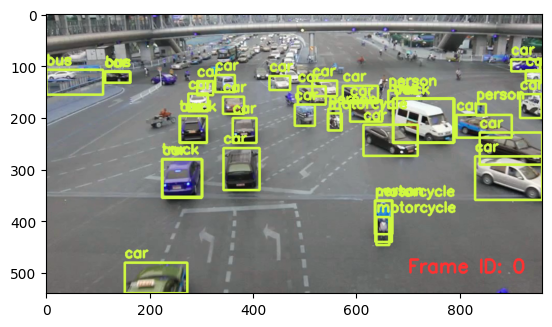

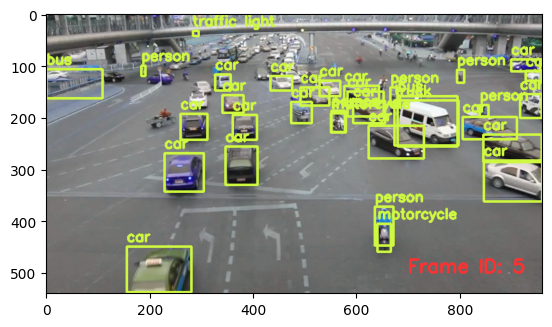

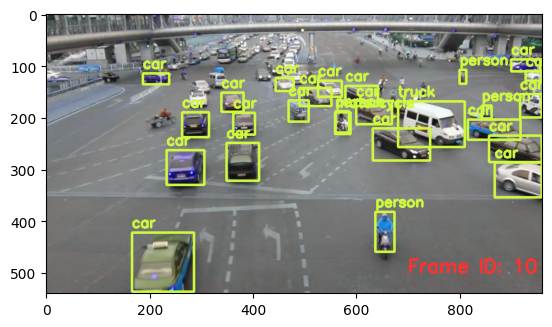

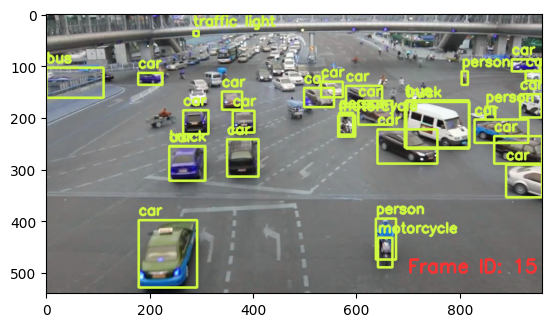

Video(value=b'\x00\x00\x00\x1cftypisom\x00\x00\x02\x00isomiso2mp41\x00\x00\x00\x08free\x00\x0c\x01Nmdat\x00\x0…

In [8]:
from ipywidgets import Video, Image
input_path = 'ua_detrac.mp4'
output_path = 'video.mp4'

dataframe = response.as_df()
annotate_video(dataframe, input_path, output_path)
Video.from_file(output_path)

### Dropping an User-Defined Function (UDF)

In [9]:
cursor.execute("DROP UDF YoloV5;")
response = cursor.fetch_all()
print(response)

@status: ResponseStatus.SUCCESS
@batch: 
                                  0
0  UDF YoloV5 successfully dropped
@query_time: 0.02130286581814289
